Importing Required Packages

In [47]:
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [48]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

# Data Validation

In [49]:
credit_card_data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
credit_card_data.tail(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.0,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.0,0


In [51]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Visualization

Text(0, 0.5, 'Frequency')

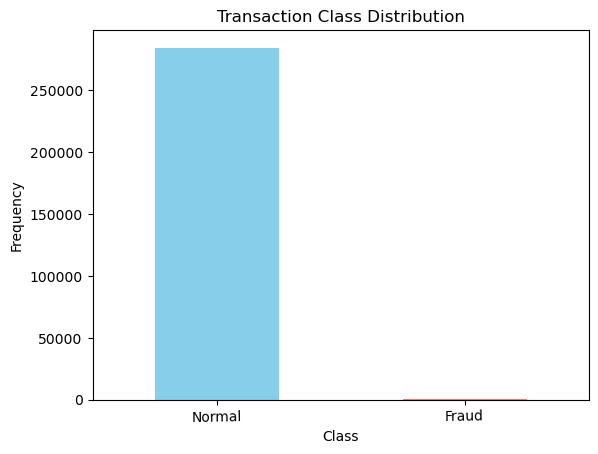

In [52]:
#import matplotlib.pyplot as plt

count_classes = pd.value_counts(credit_card_data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=1, color=['skyblue', 'salmon'])

plt.title("Transaction Class Distribution")
LABELS = ["Legit", "Fraud"]

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

#frequency = number of rows
# 0 = Legit Transactions
# 1 = Fraud  Transactions
plt.ylabel("Frequency")

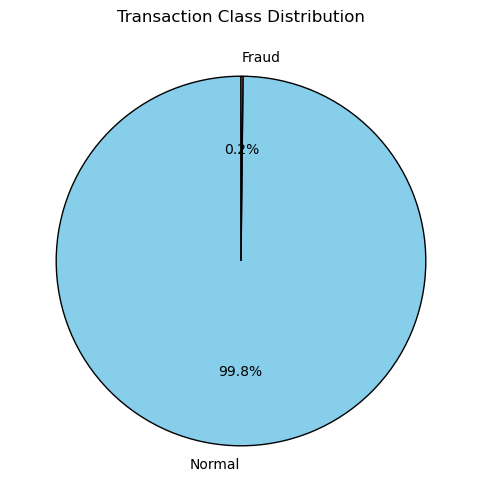

In [53]:
# Plot pie chart
plt.figure(figsize=(6,6))
count_classes.plot(kind='pie', 
                   autopct='%1.1f%%',  # Display percentages
                   startangle=90,      # Start the pie chart at 90 degrees
                   colors=['skyblue', 'salmon'],  # Customize pie colors
                   labels=["Normal", "Fraud"],    # Add labels
                   wedgeprops={'edgecolor': 'black'})  # Add edge color

# Add a title
plt.title("Transaction Class Distribution")
plt.ylabel('')  # Remove the default ylabel

# Show the plot
plt.show()

# Data Cleaning

In [54]:
# Null rows are not available
credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Data Pre-Processing

In [55]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
#Legit -- 0
#Fraud -- 1

In [56]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


# ML Modelling

In [57]:
from imblearn.under_sampling import NearMiss


In [58]:
# Separate features and target variable
X = credit_card_data.iloc[: , :-1].values
Y = credit_card_data.iloc[: , -1].values

In [59]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [60]:
# Implementing Oversampling for Handling Imbalanced 
#smk = SMOTETomek(random_state=42)
#X_res1,y_res1=smk.fit_resample(X,Y)

In [61]:
#print(X_res1.shape)
#print(y_res1.shape)

In [62]:
print(X_res.shape)
print(y_res.shape)

(984, 30)
(984,)


In [63]:
from collections import Counter

print(Counter(Y))   #Y = imbalanced dataset
print(Counter(y_res))    #y_res = balanced dataset


Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


In [64]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res, y_res, test_size=0.2)
#Train= 80% data
#Test = 20% data

In [65]:
print(X.shape, X_train.shape, X_test.shape,Y_train.shape)

(284807, 30) (787, 30) (197, 30) (787,)


Model Building

In [68]:
model = LogisticRegression(max_iter=10000, random_state=0)

In [69]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [70]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9669631512071156
Accuracy score on Test Data :  0.949238578680203


# Model Evaluation 

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

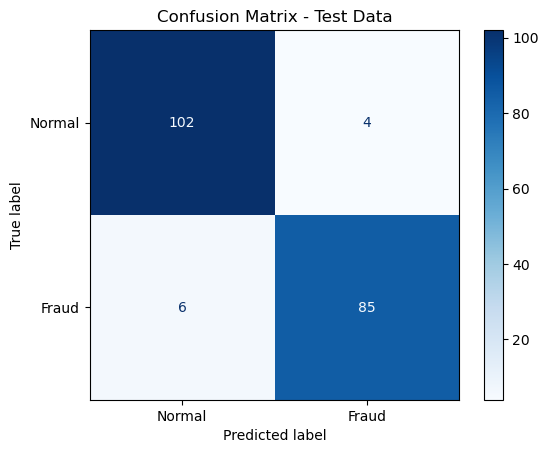

In [72]:
# --- Confusion Matrix for test data ---
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Normal", "Fraud"])
disp.plot(cmap=plt.cm.Blues)  # Use blue color map
plt.title("Confusion Matrix - Test Data")
plt.show()

In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc, classification_report
import matplotlib.pyplot as plt

AUC-ROC: 0.9872486004561476
Precision-Recall AUC: 0.9883746365329856


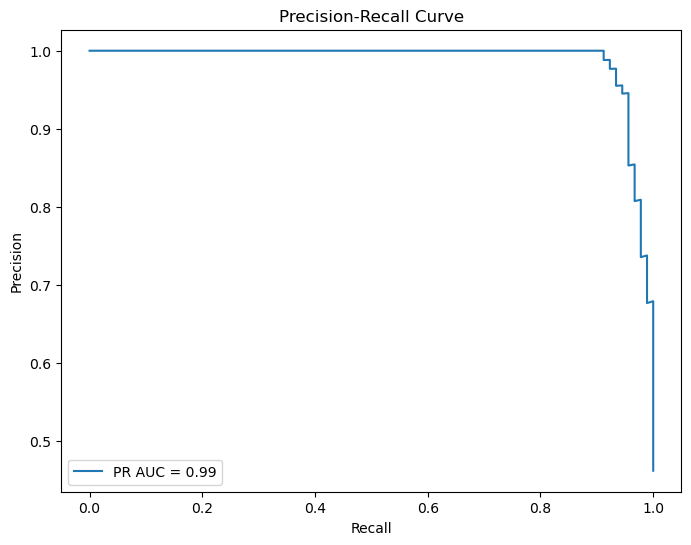

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.96      0.93      0.94        91

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



In [74]:
# --- AUC-ROC and Precision-Recall ---

# Predict probabilities instead of labels
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# AUC-ROC
roc_auc = roc_auc_score(Y_test, y_proba)
print(f"AUC-ROC: {roc_auc}")

# Precision-Recall curve and AUC
#precision - True positive percentage
#recall - true positive divided by (true positive + False Negative) 
precision, recall, _ = precision_recall_curve(Y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Classification Report
print(classification_report(Y_test, X_test_prediction))

# Feature Engineering

In [75]:
# Implementing Oversampling for Handling Imbalanced 
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)
X_res1,y_res1=smk.fit_resample(X,Y)

In [76]:
print(X_res1.shape)
print(y_res1.shape)

(567562, 30)
(567562,)


In [77]:
from collections import Counter
print(Counter(Y))
print(Counter(y_res1))

Counter({0: 284315, 1: 492})
Counter({0: 283781, 1: 283781})


#### Train-Test Split

In [78]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_res1, y_res1, test_size=0.2)

In [79]:
print(X.shape, X_train.shape, X_test.shape,Y_train.shape)

(284807, 30) (454049, 30) (113513, 30) (454049,)


#### Model Building

In [80]:
model = LogisticRegression(max_iter=100000, random_state=0)

In [81]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=100000, random_state=0)

In [82]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9808236555966426
Accuracy score on Test Data :  0.98033705390572


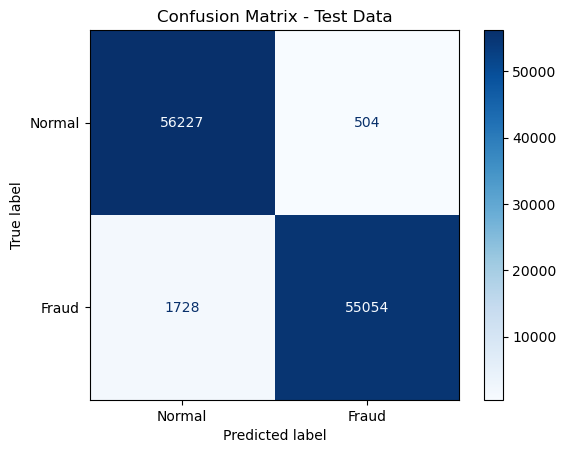

In [83]:
# --- Confusion Matrix for test data ---
conf_matrix = confusion_matrix(Y_test, X_test_prediction)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Normal", "Fraud"])
disp.plot(cmap=plt.cm.Blues)  # Use blue color map
plt.title("Confusion Matrix - Test Data")
plt.show()

AUC-ROC: 0.9973440592460103
Precision-Recall AUC: 0.9976995150849124


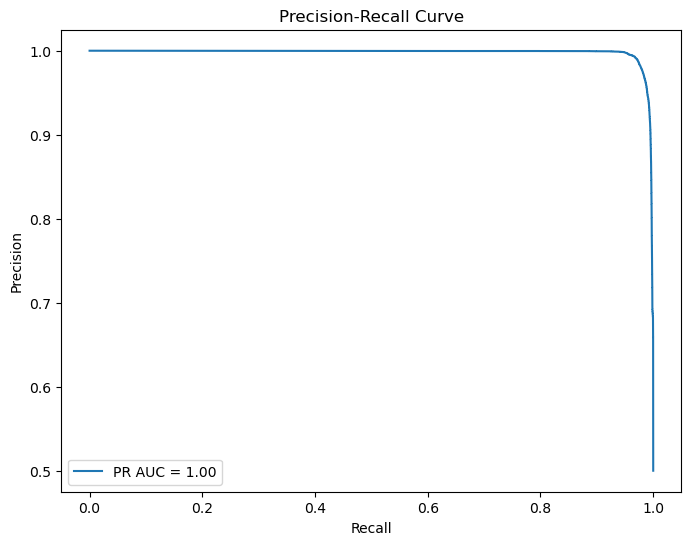

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56731
           1       0.99      0.97      0.98     56782

    accuracy                           0.98    113513
   macro avg       0.98      0.98      0.98    113513
weighted avg       0.98      0.98      0.98    113513



In [84]:
# --- AUC-ROC and Precision-Recall ---

# Predict probabilities instead of labels
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (fraud)

# AUC-ROC
roc_auc = roc_auc_score(Y_test, y_proba)
print(f"AUC-ROC: {roc_auc}")

# Precision-Recall curve and AUC
precision, recall, _ = precision_recall_curve(Y_test, y_proba)
pr_auc = auc(recall, precision)
print(f"Precision-Recall AUC: {pr_auc}")

# Plotting Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

# Classification Report
print(classification_report(Y_test, X_test_prediction))